In [1]:
from gensim.models import Word2Vec, FastText
from note_reader import get_notes
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
plt.rcParams["font.family"] = ["Times"]
UNK_TAG = "<UNK>"

In [3]:
file_list = glob.glob("data/txt/*.txt")

In [4]:
docs, counts = get_notes(file_list, as_pitch_classes=True, return_counts=True)

In [5]:
pitches_sorted = counts.most_common()
pitches, pitch_counts = zip(*pitches_sorted)

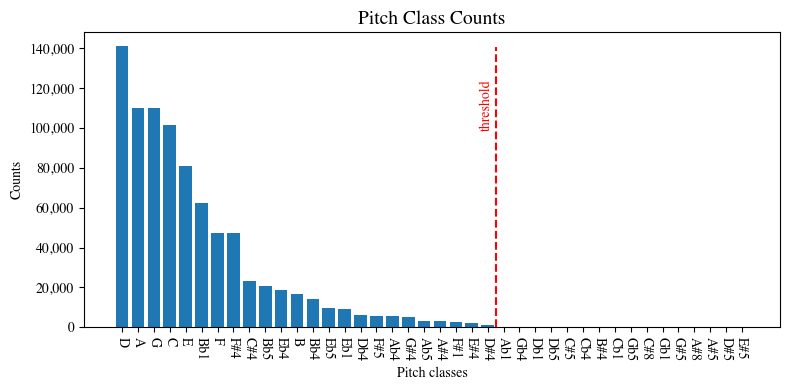

In [6]:
fig = plt.figure(figsize=(8, 4))
plt.title("Pitch Class Counts", fontdict={"fontsize": 14})
plt.xlabel("Pitch classes")
plt.xticks(rotation=-90)
plt.ylabel("Counts")
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.bar(pitches, pitch_counts)
plt.tight_layout()
plt.axvline(x=23.5, ymax=0.95, color="r", linestyle="--")
plt.text(22.5, 100000, "threshold", rotation=90, color="r")
plt.show()

In [7]:
common_pitches = [x[0] for x in counts.most_common(24)]
common_docs = []
for doc in docs:
    common_doc = [x if x in common_pitches else UNK_TAG for x in doc]
    common_docs.append(common_doc)

In [21]:
w2v_model = Word2Vec(sentences=common_docs, vector_size=20, epochs=10, window=4)
w2v_model.wv.most_similar(positive=["C", "A"], negative=["G"], topn=3) # D

[('D', 0.23865756392478943),
 ('Bb1', 0.2296978086233139),
 ('Db4', 0.2076379805803299)]

In [22]:
w2v_model.wv.most_similar("G")

[('F#4', 0.48194420337677),
 ('Ab4', 0.254323810338974),
 ('Eb4', 0.2507176995277405),
 ('Eb1', 0.22854338586330414),
 ('Eb5', 0.13172194361686707),
 ('Bb5', 0.12587963044643402),
 ('E#4', 0.09704025834798813),
 ('A', 0.035312797874212265),
 ('Ab5', 0.02530495822429657),
 ('D', -0.09909392148256302)]

In [23]:
w2v_model.wv.similarity("G", "A")

0.035312817

# Find analogies

`model.most_similar(positive=["woman", "king"], negative=["man"], topn = 1) --> "queen"`

In [24]:
w2v_model.wv.most_similar(positive=["C", "A"], negative=["G"]) # D

[('D', 0.23865756392478943),
 ('Bb1', 0.2296978086233139),
 ('Db4', 0.2076379805803299),
 ('E', 0.20417320728302002),
 ('G#4', 0.1345554143190384),
 ('B', 0.10277970135211945),
 ('A#4', 0.10027698427438736),
 ('F#5', 0.07763787358999252),
 ('Eb5', 0.018352085724473),
 ('Bb5', 0.017331765964627266)]

In [38]:
ft_model = FastText(sentences=common_docs, vector_size=10, epochs=20, window=5)
ft_model.wv.most_similar(positive=["C", "A"], negative=["G"]) # D

[('D', 0.5452758073806763),
 ('Bb1', 0.423415869474411),
 ('B', 0.4194720387458801),
 ('E', 0.32279717922210693),
 ('Db4', 0.25284790992736816),
 ('G#4', 0.19479401409626007),
 ('F#1', 0.07765946537256241),
 ('Eb5', 0.045280199497938156),
 ('A#4', 0.040263812988996506),
 ('Bb5', -0.0744098573923111)]

In [39]:
ft_model.wv.most_similar("G")

[('F#4', 0.7947971820831299),
 ('E#4', 0.32528552412986755),
 ('A', 0.3252469301223755),
 ('Eb4', 0.3119242489337921),
 ('Ab4', 0.305243581533432),
 ('Bb5', 0.29659807682037354),
 ('Bb4', 0.17049190402030945),
 ('F#1', 0.1293639838695526),
 ('Ab5', 0.03770500048995018),
 ('C#4', 0.011436238884925842)]

In [40]:
ft_model.wv["G"]

array([-0.05784852,  0.3094884 , -1.2806416 ,  0.86850876, -0.10262622,
        3.82322   , -1.956597  ,  1.0811907 ,  2.202882  ,  0.20097518],
      dtype=float32)

In [41]:
ft_model.wv.most_similar(positive=["C", "A"], negative=["G"]) # D

[('D', 0.5452758073806763),
 ('Bb1', 0.423415869474411),
 ('B', 0.4194720387458801),
 ('E', 0.32279717922210693),
 ('Db4', 0.25284790992736816),
 ('G#4', 0.19479401409626007),
 ('F#1', 0.07765946537256241),
 ('Eb5', 0.045280199497938156),
 ('A#4', 0.040263812988996506),
 ('Bb5', -0.0744098573923111)]

In [42]:
np.rad2deg(np.arccos(ft_model.wv.similarity("G", "F#4")))

37.3639